In [1]:
# data => https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [14]:
df['Customer_Segment'].value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [32]:
df.shape

(178, 14)

In [20]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
df_scaled = sca.fit_transform(df)

In [22]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()

In [26]:
df_pca = pca.fit_transform(df_scaled)

In [30]:
var = pca.explained_variance_ratio_

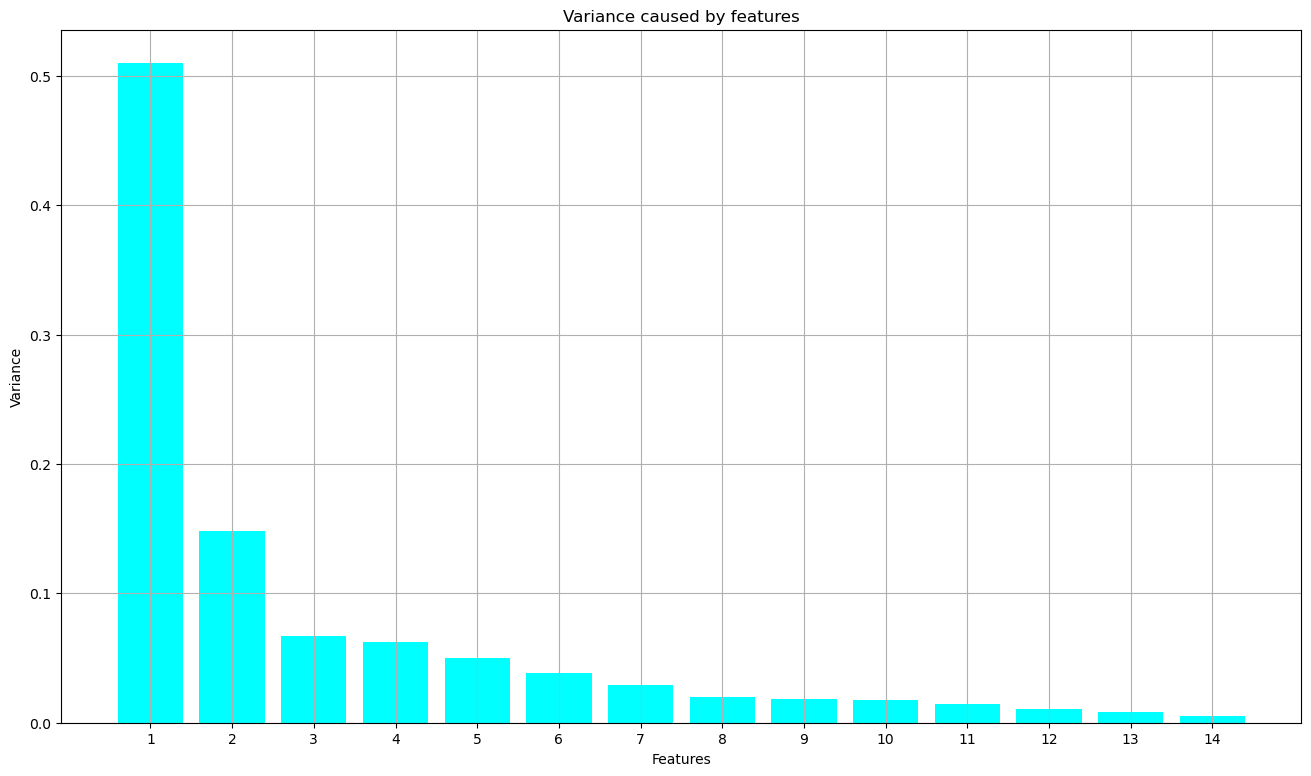

In [34]:
plt.figure(figsize=(16, 9))
plt.title('Variance caused by features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(range(1,15,1))
plt.bar(range(1, 15), var, color = 'cyan')
plt.grid()

In [48]:
pca = PCA(n_components= 7)

In [50]:
df_pca = pca.fit_transform(df_scaled)

In [52]:
df_pca

array([[-0.84760416, -0.24314632,  0.02975173, ..., -0.00272827,
         0.03880984,  0.04914587],
       [-0.6786508 , -0.00571174, -0.28396974, ..., -0.24817106,
        -0.02610397, -0.01303162],
       [-0.70037223, -0.18386807,  0.19745712, ...,  0.04922838,
        -0.04405415,  0.14118661],
       ...,
       [ 0.82065832, -0.55246914, -0.02074951, ..., -0.01576502,
         0.02190653,  0.1936336 ],
       [ 0.77726837, -0.4302553 , -0.09551105, ...,  0.21516609,
        -0.04478047,  0.16155678],
       [ 0.8758746 , -0.52183358,  0.28745683, ...,  0.03227202,
        -0.10074274, -0.10993315]])

In [54]:
# so after extracting 7 features can for clusters to chack red or white wine

In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2)
labels = km.fit_predict(df_pca)

In [62]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [64]:
zero = df[labels == 0]

In [66]:
one = df[labels == 1]

In [68]:
zero

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,2
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380,2
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,2
